# Image to Pencil Sketch with python

Performer- Naman Sahu

In [22]:
import io
import cv2
from PIL import Image
from IPython.display import display as dsp
import matplotlib.pyplot as plt 
%matplotlib inline
from google.colab.patches import cv2_imshow

In [25]:
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread('/content/drive/MyDrive/data/beckham.jpg',1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


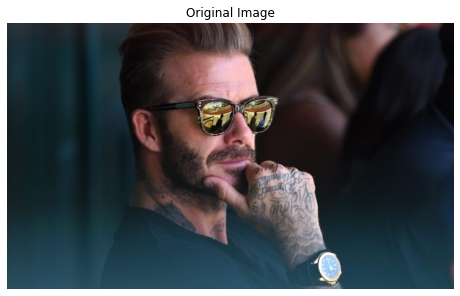

In [26]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

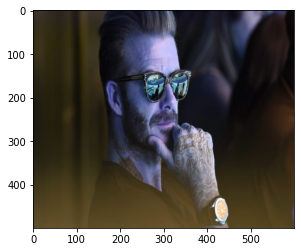

In [27]:
img = cv2.resize(img, (600, 500))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

CONVERTING TO GRAY SCALE

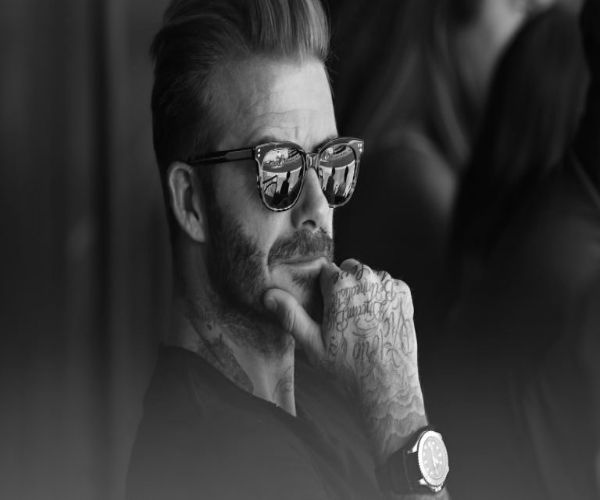

In [29]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dsp(Image.fromarray(img_gray))

INERTING THE IMAGE

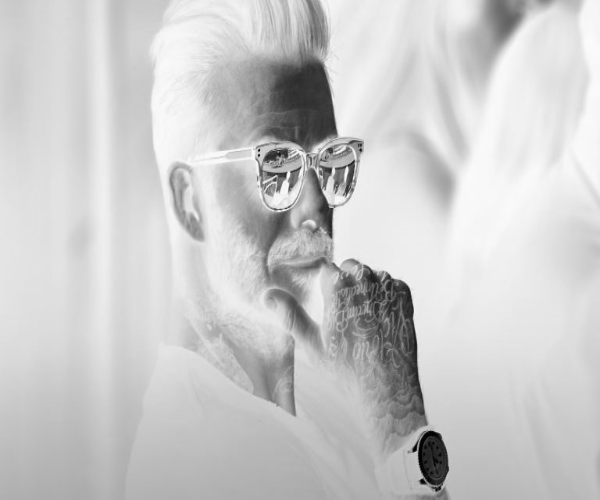

In [30]:
img_invert = cv2.bitwise_not(img_gray)
cv2_imshow(img_invert)

SMOOTHING THE IMAGE

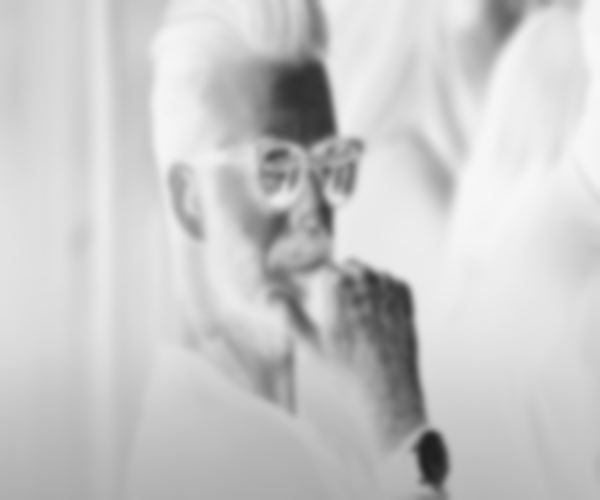

In [31]:
img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
cv2_imshow(img_smoothing)

OBTAINING THE FINAL SKETCH

In [32]:
def dodgeV2(x, y):
    return cv2.divide(x, 255 - y, scale=256)

# The Final Sketch

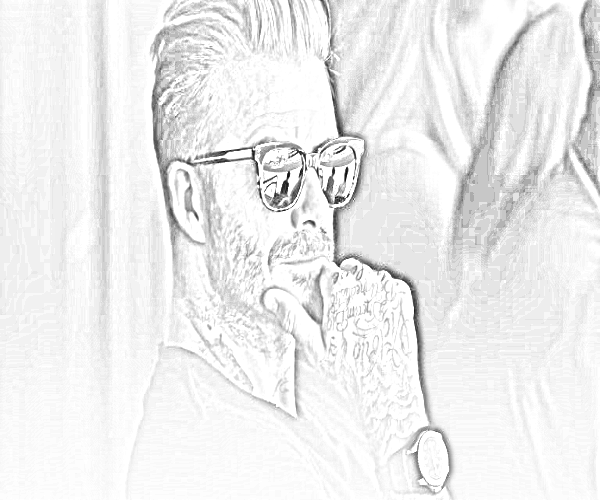

In [33]:
final_img = dodgeV2(img_gray, img_smoothing)
cv2_imshow(final_img)